In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from scipy.ndimage import gaussian_filter

# Download the data from the following link:
# link = "https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/image_train00.npy"
# !wget -q -O image_train00.npy $link

# Load the data using numpy and transpose it to match shape x, y, z
image_train00 = np.load("image_train00.npy").T
from Image3D import Image3D
# Experiment 1: Volume resizing
# Implement upsampling such that the resized volume has an isotropic voxel dimension
# An isotropic voxel dimension means that the size of the voxels in a 3D image is the same along all three dimensions.
# This can be useful in medical imaging, as it ensures that the image resolution is the same in all directions
# and allows for more accurate measurements.

# The voxel dimensions of a 3D image are directly related to the resolution of the image.
# In general, the smaller the voxel dimensions, the higher the resolution of the image.

# Create an instance of the Image3D class
# Voxel dimensions are set to 0.5, 0.5, 2 mm
image3d = Image3D(image_train00, (0.5, 0.5, 2))


# Create helper function for upsampling, downsampling and resampling images using Image3D class
def resize_image(image3d_object, final_voxel_dimension, antialias = False, sigma = 1):
    """
    This is a helper function for upsampling, downsampling and resampling images using Image3D class

    Parameters

    ----------
    image3d_object : Image3D
        An instance of the Image3D class
    final_voxel_dimension : float
        The final voxel dimension of the resized image
    antialias : bool
        If True, gaussian filtering is applied to the resized image
    sigma : float  
        The standard deviation of the gaussian filter

    Returns

    -------
    resized_image : numpy.ndarray
        The resized image

    """


    resize_ratio = np.array(image3d_object.voxel_dimension) / final_voxel_dimension
    if antialias:
        resized_image = image3d_object.volume_resize_antialias(resize_ratio, sigma = sigma)
    else:
        resized_image = image3d_object.volume_resize(resize_ratio)
    return resized_image

# Create function to save axial slices of the resized images
def save_axial_slices(original_image_object, resized_image_object, voxel_dimension, slice_number_origin, filename, title):
    """
    This is a helper function to save axial slices of the resized images

    Parameters

    ----------
    original_image_object : Image3D object
        The original image object
    resized_image : Image3D object
        The resized image object
    voxel_dimension : float
        The voxel dimension of the resized image
    slice_number_origin : int
        The slice number in the original image to be saved
    filename : str
        The filename of the saved image
    title : str
        The title of the saved image

    Returns

    -------
    None

    """

    ratio = int(original_image_object.voxel_dimension[2] / resized_image_object.voxel_dimension[2])
    fig, (ax) = plt.subplots(1, figsize=(6, 6))
    ax.imshow(resized_image_object.image[:, :, slice_number_origin*ratio], cmap = "bone")
    ax.set_title(f"Axial slice of {title}")
    #ax.set_title(f"Axial slice of upsampled image with voxel dimensions {voxel_dimension}mm")
    ax.set_xlabel("x (mm)")
    ax.set_ylabel("y (mm)")
    plt.savefig(f"{filename}_slice_{slice_number_origin}.png")
    plt.close(fig)


# ------------------------------------------------------------------------------------------------------------

# Experiment 1.1.1: Upsampling
# In upsampling, the final voxel dimension should be smaller than the original voxel dimension
# Time the execution of the upsampling function without pre-filtering
print(f"Time taken to upsample the image without pre-filtering \n")
%time
upsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 0.3)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = upsampled_image,
    voxel_dimension = upsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_upsampled", title= "upsampled image without pre-filter")



# Time the execution of the upsampling function with pre-filtering
print(f"Time taken to upsample the image with pre-filtering \n")
%time
filtered_upsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 0.3, antialias = True, sigma = 1.5)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = filtered_upsampled_image,
    voxel_dimension = filtered_upsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_upsampled_with_filter", title= "upsampled image with pre-filter")



# Print on the time taken to execute the upsampling
print(f"Time taken to upsample the image without pre-filtering is less than the time taken to upsample the image with pre-filtering. \n This is because the pre-filtering resizing is computationally expensive since a gaussian kernel is being slid over the entire image before resizing and interpolation is done.\n")


# ------------------------------------------------------------------------------------------------------

# Experiment 1.1.2: Downsampling
# In downsampling, the final voxel dimension should be larger than the original voxel dimension
# Time the execution of the downsampling function without pre-filtering
print(f"Time taken to downsample the image without pre-filtering \n")
%time
downsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 1.0)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = downsampled_image,
    voxel_dimension = downsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_downsampled", title= "downsampled image without pre-filter")

# Time the execution of the downsampling function with pre-filtering
print(f"Time taken to downsample the image with pre-filtering \n")
%time
filtered_downsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 1.0, antialias = True, sigma = 1.5)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = filtered_downsampled_image,
    voxel_dimension = filtered_downsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_downsampled_with_filter", title= "downsampled image with pre-filter")

# Print on the time taken to execute the downsampling
print(f"Time taken to downsample the image without pre-filtering is less than the time taken to downsample the image with pre-filtering. \n This is because the pre-filtering resizing is computationally expensive since a gaussian kernel is being slid over the entire image before resizing and interpolation is done.\n")


# ------------------------------------------------------------------------------------------------------

# Experiment 1.1.3: Resampling
# In resampling, the final voxel dimension can be either smaller or larger than the original voxel dimension
# Time the execution of the resampling function without pre-filtering
print(f"Time taken to resample the image without pre-filtering \n")
%time
resampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = np.array(image3d.voxel_dimension) * 2)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = resampled_image,
    voxel_dimension = resampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_resampled", title= "resampled image without pre-filter")

# Time the execution of the resampling function
print(f"Time taken to resample the image with pre-filtering \n")
%time
filtered_resampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = np.array(image3d.voxel_dimension) * 2, antialias = True, sigma = 1)

# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = filtered_resampled_image,
    voxel_dimension = filtered_resampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp1_resampled_with_filter", title= "resampled image with pre-filter")


# Print on the time taken to execute the resampling
print(f"Time taken to resample the image without pre-filtering is less than the time taken to resample the image with pre-filtering. \n This is because the pre-filtering resizing is computationally expensive since a gaussian kernel is being slid over the entire image before resizing and interpolation is done.\n")


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Experiment 2: Investigate aliasing effect

# Experiment 2.1.1: Downsample the previously up-sampled image to the original image size
downsampled_upsampled_image = resize_image(image3d_object = upsampled_image, final_voxel_dimension = image3d.voxel_dimension)

# Experiment 2.1.1: Downsample the previously up-sampled image to the original image size using pre-filtering
filtered_downsampled_upsampled_image = resize_image(image3d_object = upsampled_image, final_voxel_dimension = image3d.voxel_dimension, antialias = True, sigma = 0.5)

# Experiment 2.2: Investigate the effect of downsampling on the image
# Compute mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled images


# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
mean_diff = np.mean(image3d.image - downsampled_upsampled_image.image)
std_diff = np.std(image3d.image - downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {np.round(mean_diff, 4)} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {np.round(std_diff, 4)} \n")


# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
filtered_mean_diff = np.mean(image3d.image - filtered_downsampled_upsampled_image.image)
filtered_std_diff = np.std(image3d.image - filtered_downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {np.round(filtered_mean_diff, 4)} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {np.round(filtered_std_diff, 4)} \n")

# Experiment 2.3: For each resized image, save 5 example axial slices to PNG files
# save 5 axial slices as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = downsampled_upsampled_image,
    voxel_dimension = downsampled_upsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp2_downsampled_prev-upsampled", title= "downsampled slice of previously upsampled slice")

# Save slices for when downsample was done with filtering
for slice in [15, 20, 22, 26, 31]:
    save_axial_slices(original_image_object = image3d, resized_image_object = filtered_downsampled_upsampled_image,
    voxel_dimension = filtered_downsampled_upsampled_image.voxel_dimension,
    slice_number_origin = slice,
    filename = "exp2_filtered_downsampled_prev-upsampled", title= "downsampled slice of previously filtered upsampled slice")


# Comment on the differences
# The above values suugest that pre-filtering has reduced the average difference in intensity 
# between the original and downsampled images. This can be observed in the fact that the
# mean of the voxel-level intensity differences with pre-filtering is slightly lower compared
# to the mean without pre-filtering.
# 
# The standard deviation of the voxel-level intensity differences is higher in pre-filetring than
# the standard deviation without pre-filtering. This value is higher when the amount of blurring is higher.
# This observation suggests that the blurring introduced by pre-filtering can result in
# larger intensity differences in certain regions of the image which contributes to a higher standard deviation
#  of the voxel-level intensity differences with pre-filtering compared to without pre-filtering.

# Print the comment above
print(f"The above values suugest that pre-filtering has reduced the average difference in intensity \n between the original and downsampled images. This can be observed in the fact that the \n mean of the voxel-level intensity differences with pre-filtering is slightly lower compared \n to the mean without pre-filtering. \n")
print(f"The standard deviation of the voxel-level intensity differences is higher in pre-filetring than \n the standard deviation without pre-filtering. This value is higher when the amount of blurring is higher. \n This observation suggests that the blurring introduced by pre-filtering can result in \n larger intensity differences in certain regions of the image which contributes to a higher standard deviation \n of the voxel-level intensity differences with pre-filtering compared to without pre-filtering. \n")


In [8]:
np.round(1.222256, 4)

1.2223

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from scipy.ndimage import gaussian_filter

# Download the data from the following link:
# link = "https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/-/raw/promise12/image_train00.npy"
# !wget -q -O image_train00.npy $link

# Load the data using numpy and transpose it to match shape x, y, z
image_train00 = np.load("image_train00.npy").T
from Image3D import Image3D
# Experiment 1: Volume resizing
# Implement upsampling such that the resized volume has an isotropic voxel dimension
# An isotropic voxel dimension means that the size of the voxels in a 3D image is the same along all three dimensions.
# This can be useful in medical imaging, as it ensures that the image resolution is the same in all directions
# and allows for more accurate measurements.

# The voxel dimensions of a 3D image are directly related to the resolution of the image.
# In general, the smaller the voxel dimensions, the higher the resolution of the image.

# Create an instance of the Image3D class
# Voxel dimensions are set to 0.5, 0.5, 2 mm
image3d = Image3D(image_train00, (0.5, 0.5, 2))
def resize_image(image3d_object, final_voxel_dimension, antialias = False, sigma = 1):
    """
    This is a helper function for upsampling, downsampling and resampling images using Image3D class

    Parameters

    ----------
    image3d_object : Image3D
        An instance of the Image3D class
    final_voxel_dimension : float
        The final voxel dimension of the resized image
    antialias : bool
        If True, gaussian filtering is applied to the resized image
    sigma : float  
        The standard deviation of the gaussian filter

    Returns

    -------
    resized_image : numpy.ndarray
        The resized image

    """


    resize_ratio = np.array(image3d_object.voxel_dimension) / final_voxel_dimension
    if antialias:
        resized_image = image3d_object.volume_resize_antialias(resize_ratio, sigma = sigma)
    else:
        resized_image = image3d_object.volume_resize(resize_ratio)
    return resized_image

upsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 0.4)

filtered_upsampled_image = resize_image(image3d_object = image3d, final_voxel_dimension = 0.4, antialias = True, sigma = 1.5)

In [3]:
# Print shapes of the upsampled images

print(f"Shape of the upsampled image without pre-filtering is {upsampled_image.image.shape} \n")
print(f"Shape of the upsampled image with pre-filtering is {filtered_upsampled_image.image.shape} \n")


Shape of the upsampled image without pre-filtering is (160, 160, 160) 

Shape of the upsampled image with pre-filtering is (160, 160, 160) 



In [4]:
# Print voxel dimensions of the upsampled images
print(f"Voxel dimensions of the upsampled image without pre-filtering is {upsampled_image.voxel_dimension} \n")
print(f"Voxel dimensions of the upsampled image with pre-filtering is {filtered_upsampled_image.voxel_dimension} \n")
# Print voxel dimensions of the original image
print(f"Voxel dimensions of the original image is {image3d.voxel_dimension} \n")

Voxel dimensions of the upsampled image without pre-filtering is (0.4, 0.4, 0.4) 

Voxel dimensions of the upsampled image with pre-filtering is (0.4, 0.4, 0.4) 

Voxel dimensions of the original image is (0.5, 0.5, 2) 



In [3]:
# Experiment 2: Investigate aliasing effect

# Experiment 2.1.1: Downsample the previously up-sampled image to the original image size
downsampled_upsampled_image = resize_image(image3d_object = upsampled_image, final_voxel_dimension = image3d.voxel_dimension)
# Print the shape of the downsampled image and the voxel dimensions
print(f"Shape of the downsampled image is {downsampled_upsampled_image.image.shape} \n")
print(f"Voxel dimensions of the downsampled image is {downsampled_upsampled_image.voxel_dimension} \n")
# Print voxel dimensions of the original image
print(f"Voxel dimensions of the original image is {image3d.voxel_dimension} \n")
# Print the shape of the original image
print(f"Shape of the original image is {image3d.image.shape} \n")


Shape of the downsampled image is (128, 128, 32) 

Voxel dimensions of the downsampled image is (0.5, 0.5, 2.0) 

Voxel dimensions of the original image is (0.5, 0.5, 2) 

Shape of the original image is (128, 128, 32) 



In [4]:
0.4/0.5

0.8

In [5]:

# Experiment 2.1.1: Downsample the previously up-sampled image to the original image size using pre-filtering
filtered_downsampled_upsampled_image = resize_image(image3d_object = upsampled_image, final_voxel_dimension = image3d.voxel_dimension, antialias = True, sigma = 0.5)
# Print the shape and voxel dimensions of the downsampled image with pre-filtering
print(f"Shape of the downsampled image with pre-filtering is {filtered_downsampled_upsampled_image.image.shape} \n")
print(f"Voxel dimensions of the downsampled image with pre-filtering is {filtered_downsampled_upsampled_image.voxel_dimension} \n")
# Print the shape and voxel dimensions of the original image
print(f"Shape of the original image is {image3d.image.shape} \n")
print(f"Voxel dimensions of the original image is {image3d.voxel_dimension} \n")




Shape of the downsampled image with pre-filtering is (128, 128, 32) 

Voxel dimensions of the downsampled image with pre-filtering is (0.5, 0.5, 2.0) 

Shape of the original image is (128, 128, 32) 

Voxel dimensions of the original image is (0.5, 0.5, 2) 



Text(0.5, 1.0, 'filtered_downsampled_upsampled')

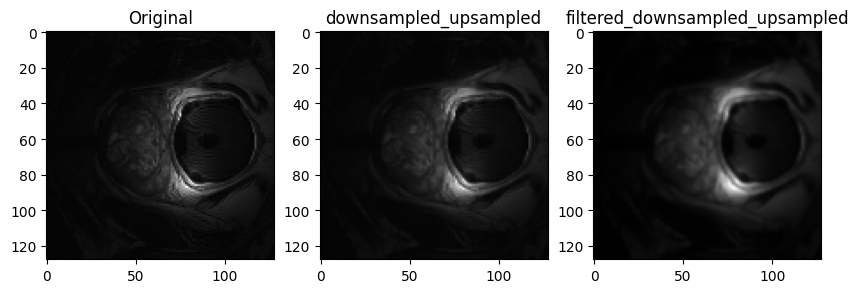

In [6]:
# Visualize slice
# Visualize example slices
slice = 15
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(image3d.image[:,:,slice], cmap='gray')
ax1.set_title('Original')
ax2.imshow(downsampled_upsampled_image.image[:,:,slice], cmap='gray')
ax2.set_title('downsampled_upsampled')
ax3.imshow(filtered_downsampled_upsampled_image.image[:,:,slice], cmap='gray')
ax3.set_title('filtered_downsampled_upsampled')

In [8]:
# Experiment 2.2: Investigate the effect of downsampling on the image
# Compute mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image


# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
mean_diff = np.mean(image3d.image - downsampled_upsampled_image.image)
std_diff = np.std(image3d.image - downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {mean_diff} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {std_diff} \n")

# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
filtered_mean_diff = np.mean(image3d.image - filtered_downsampled_upsampled_image.image)
filtered_std_diff = np.std(image3d.image - filtered_downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {filtered_mean_diff} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {filtered_std_diff} \n")


Mean of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is 0.21872446537017598 

Standard deviation of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is 47.45161740539018 

Mean of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is 0.2186482087654036 

Standard deviation of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is 47.56680370136424 



In [7]:
# Experiment 2.2: Investigate the effect of downsampling on the image
# Compute mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled images


# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
mean_diff = np.mean(image3d.image - downsampled_upsampled_image.image)
std_diff = np.std(image3d.image - downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image without pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {mean_diff} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is {std_diff} \n")

# Compute the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
filtered_mean_diff = np.mean(image3d.image - filtered_downsampled_upsampled_image.image)
filtered_std_diff = np.std(image3d.image - filtered_downsampled_upsampled_image.image)

# Print the mean and standard deviation of the voxel-level intensity differences between
# the original image and the downsampled image with pre-filtering
print(f"Mean of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {filtered_mean_diff} \n")
print(f"Standard deviation of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is {filtered_std_diff} \n")

# Comment on the above
# Hint: What is the effect of downsampling on the image? What is the effect of pre-filtering on the image?


Mean of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is 0.21872446537017598 

Standard deviation of the voxel-level intensity differences between the original image and the downsampled image without pre-filtering is 47.45161740539018 

Mean of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is 0.19380671366156516 

Standard deviation of the voxel-level intensity differences between the original image and the downsampled image with pre-filtering is 83.20808837030916 



In [ ]:
# The above values suugest that pre-filtering has reduced the average difference in intensity 
# between the original and downsampled images. This can be observed in the fact that the
# mean of the voxel-level intensity differences with pre-filtering is slightly lower compared
# to the mean without pre-filtering.
# 
# The standard deviation of the voxel-level intensity differences is higher in pre-filetring than
# the standard deviation without pre-filtering. This value is higher when the amount of blurring is higher.
# This observation suggests that the blurring introduced by pre-filtering can result in
# larger intensity differences in certain regions of the image which contributes to a higher standard deviation
#  of the voxel-level intensity differences with pre-filtering compared to without pre-filtering.

# This suggests that pre-filtering however has not reduced the dispersion/variation of the intensity differences
# compared to the original image.

In [ ]:
# Comment on the results
# Hint: What is the effect of downsampling on the image? What is the effect of pre-filtering on the image?




In [3]:
np.mean(image3d.image)

258.76988410949707

: 

low sigma, low filtering, similar ?

In [1]:
import time

start = time.time()
x = [i**2 for i in range(100000)]
end = time.time()
print('Execution time:', end - start)


Execution time: 0.03224062919616699
